In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
# Load boston data
bostn = load_boston()
bostn.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# Check information regarding datasets
print(bostn.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Loading datasets and creating DataFrame for features only
df_feature = pd.DataFrame(data = bostn.data , columns= bostn.feature_names)
df_feature.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Creating dataframe for target variable
sr_target = pd.Series(data=bostn.target, name='Price')

# Concatinating two data frames feature and target
df_boston = pd.concat([df_feature,sr_target], axis=1)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
#  Check if the data frame has any null values
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### **Task 1: Data Exploration and Preprocessing**

*All columns data type is numeric, so no numeric column selection is required*


In [7]:
correlation_matrix = df_boston.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
# Checking the statistics of dataset
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

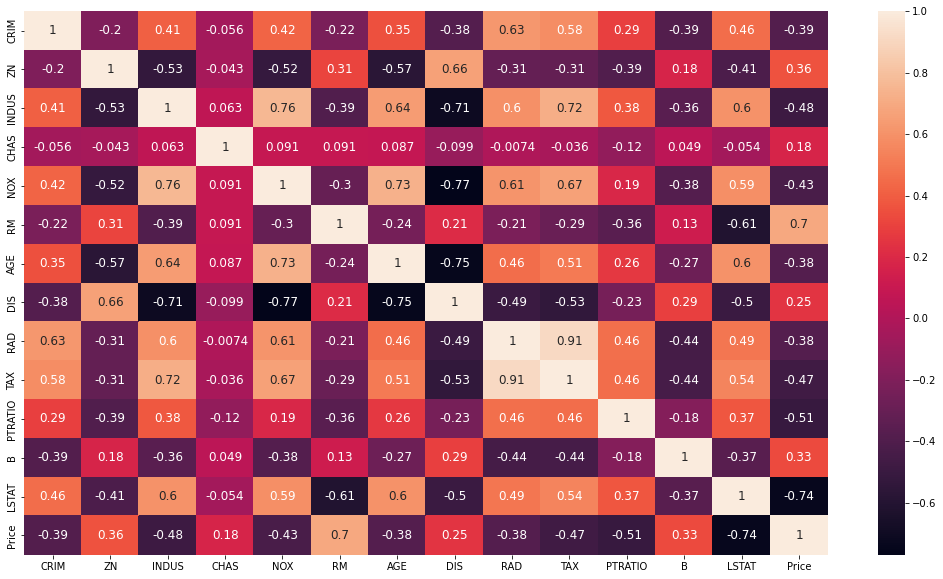

In [9]:
fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(correlation_matrix, annot=True, annot_kws = {'size': 12} )

**Visualize the distribution of the target variable and important features using histograms, box plots, and scatter plots**

In [10]:
# Selecting features which has strong corelation with target variable from correlation matrix
def getTargetFeaturepair(correlation_matrix , targetVariable='Price'):    
    unstack = correlation_matrix.unstack()
    # We know what our target variable is 
    target_variable = targetVariable
    df_coef = pd.DataFrame(columns=['Target', 'Feature', 'Corr_coef'])
    for multiIndex in unstack.index:
        if multiIndex[0]==target_variable:
            # Get correlation having strong positive and negative from threshold value +- 0.5 (Suppose)
            if correlation_matrix[multiIndex[0]][multiIndex[1]] > 0.5 or correlation_matrix[multiIndex[0]][multiIndex[1]] < -0.5:
                corr_coef = correlation_matrix[multiIndex[0]][multiIndex[1]]
                df_coef = df_coef.append({
                    'Target': target_variable,
                    'Feature': multiIndex[1],
                    'Corr_coef': corr_coef
                }, ignore_index=True)
    return df_coef

df_coef = getTargetFeaturepair(correlation_matrix)
df_coef

,Target,Feature,Corr_coef
0,Price,RM,0.695360
1,Price,PTRATIO,-0.507787
2,Price,LSTAT,-0.737663
3,Price,Price,1.000000


**Visualization between Price and RM which has a strong positive correlation**

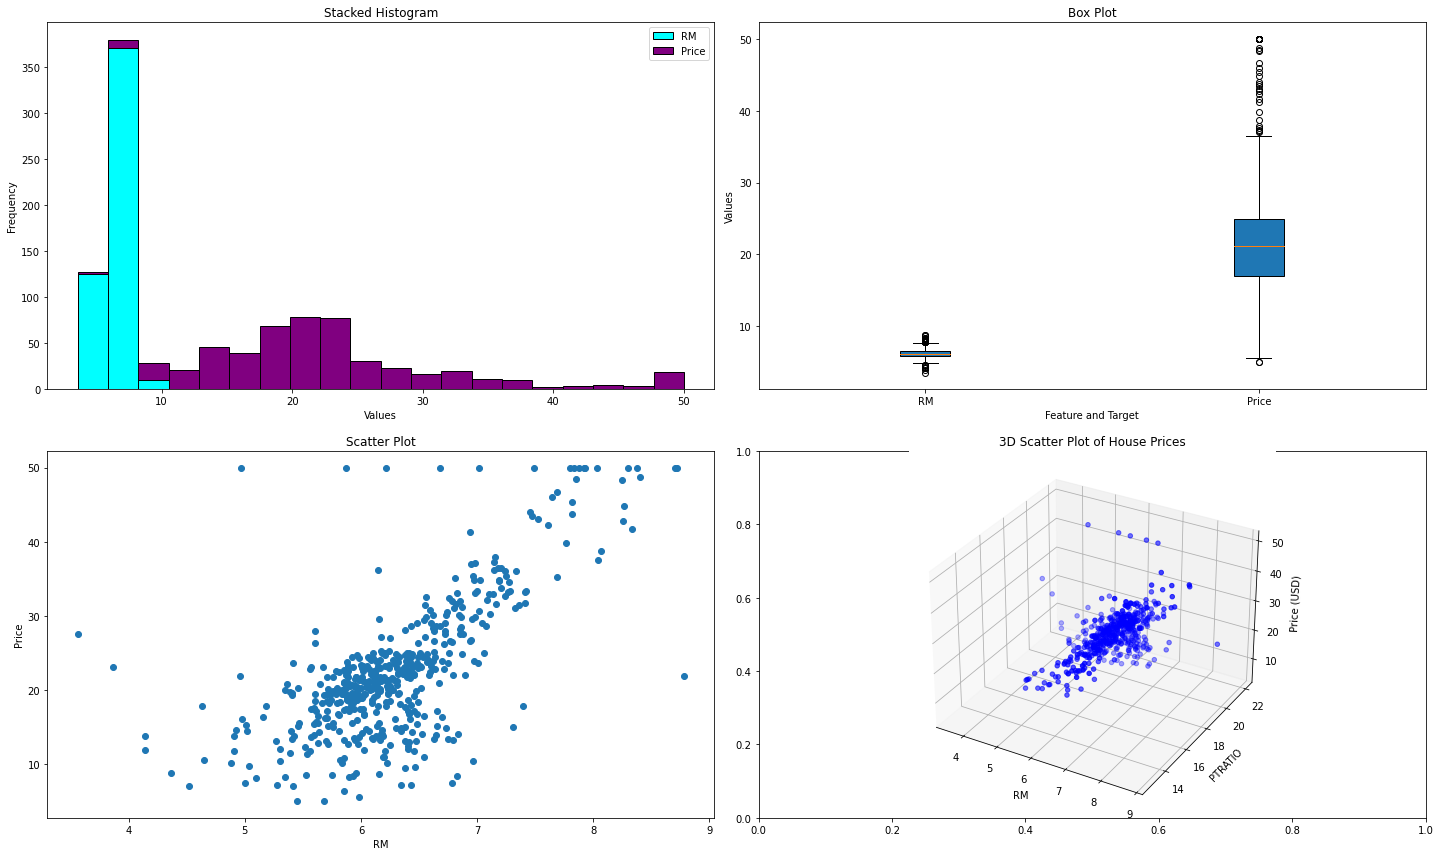

In [12]:
fig, axis = plt.subplots(2,2, figsize = (20,12))

# Creating a stacked histogram
axis[0,0].hist([df_boston['RM'], df_boston['Price']], bins=20, stacked=True, color=['cyan', 'Purple'], edgecolor='black')
axis[0,0].legend(['RM', 'Price'])
axis[0,0].set_xlabel('Values')
axis[0,0].set_ylabel('Frequency')
axis[0,0].set_title('Stacked Histogram')

# Creating box plot
axis[0,1].boxplot([df_boston['RM'], df_boston['Price']], patch_artist=True, labels=['RM', 'Price'])
axis[0,1].set_title('Box Plot')
axis[0,1].set_xlabel('Feature and Target')
axis[0,1].set_ylabel('Values')

# Creating Scatter plot
axis[1,0].scatter(x = df_boston['RM'], y = df_boston['Price'])
axis[1,0].set_title('Scatter Plot')
axis[1,0].set_xlabel('RM')
axis[1,0].set_ylabel('Price')


# Creating a 3D scatter plot in the bottom-right (1,1) subplot
axis_3d = fig.add_subplot(2, 2, 4, projection='3d')

axis_3d.scatter(df_boston['RM'], df_boston['PTRATIO'], df_boston['Price'], c='blue', marker='o')
axis_3d.set_xlabel('RM')
axis_3d.set_ylabel('PTRATIO')
axis_3d.set_zlabel('Price (USD)')
axis_3d.set_title('3D Scatter Plot of House Prices')

# Display the plot
plt.tight_layout()
plt.show()

**Visualization between Price and PTRATIO which has a strong negative correlation**

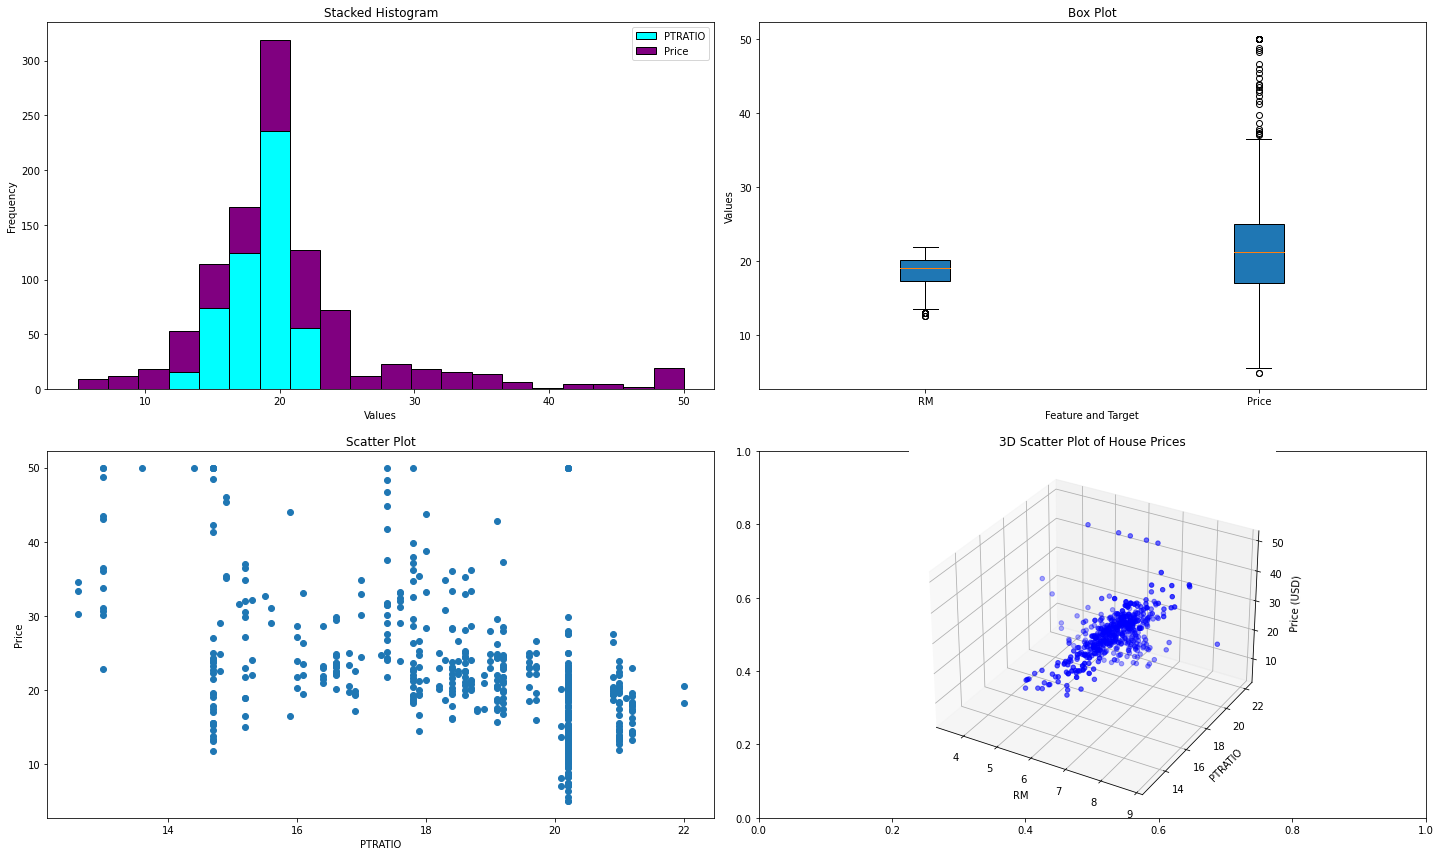

In [13]:
fig, axis = plt.subplots(2,2, figsize = (20,12))

# Creating a stacked histogram
axis[0,0].hist([df_boston['PTRATIO'], df_boston['Price']], bins=20, stacked=True, color=['cyan', 'Purple'], edgecolor='black')
axis[0,0].legend(['PTRATIO', 'Price'])
axis[0,0].set_xlabel('Values')
axis[0,0].set_ylabel('Frequency')
axis[0,0].set_title('Stacked Histogram')

# Creating box plot
axis[0,1].boxplot([df_boston['PTRATIO'], df_boston['Price']], patch_artist=True, labels=['RM', 'Price'])
axis[0,1].set_title('Box Plot')
axis[0,1].set_xlabel('Feature and Target')
axis[0,1].set_ylabel('Values')

# Creating Scatter plot
axis[1,0].scatter(x = df_boston['PTRATIO'], y = df_boston['Price'])
axis[1,0].set_title('Scatter Plot')
axis[1,0].set_xlabel('PTRATIO')
axis[1,0].set_ylabel('Price')

# Creating a 3D scatter plot in the bottom-right (1,1) subplot
axis_3d = fig.add_subplot(2, 2, 4, projection='3d')

axis_3d.scatter(df_boston['RM'], df_boston['PTRATIO'], df_boston['Price'], c='blue', marker='o')
axis_3d.set_xlabel('RM')
axis_3d.set_ylabel('PTRATIO')
axis_3d.set_zlabel('Price (USD)')
axis_3d.set_title('3D Scatter Plot of House Prices')

# Display the plot
plt.tight_layout()
plt.show()


**Visualization between Price and LSTAT which has a strong negative correlation**

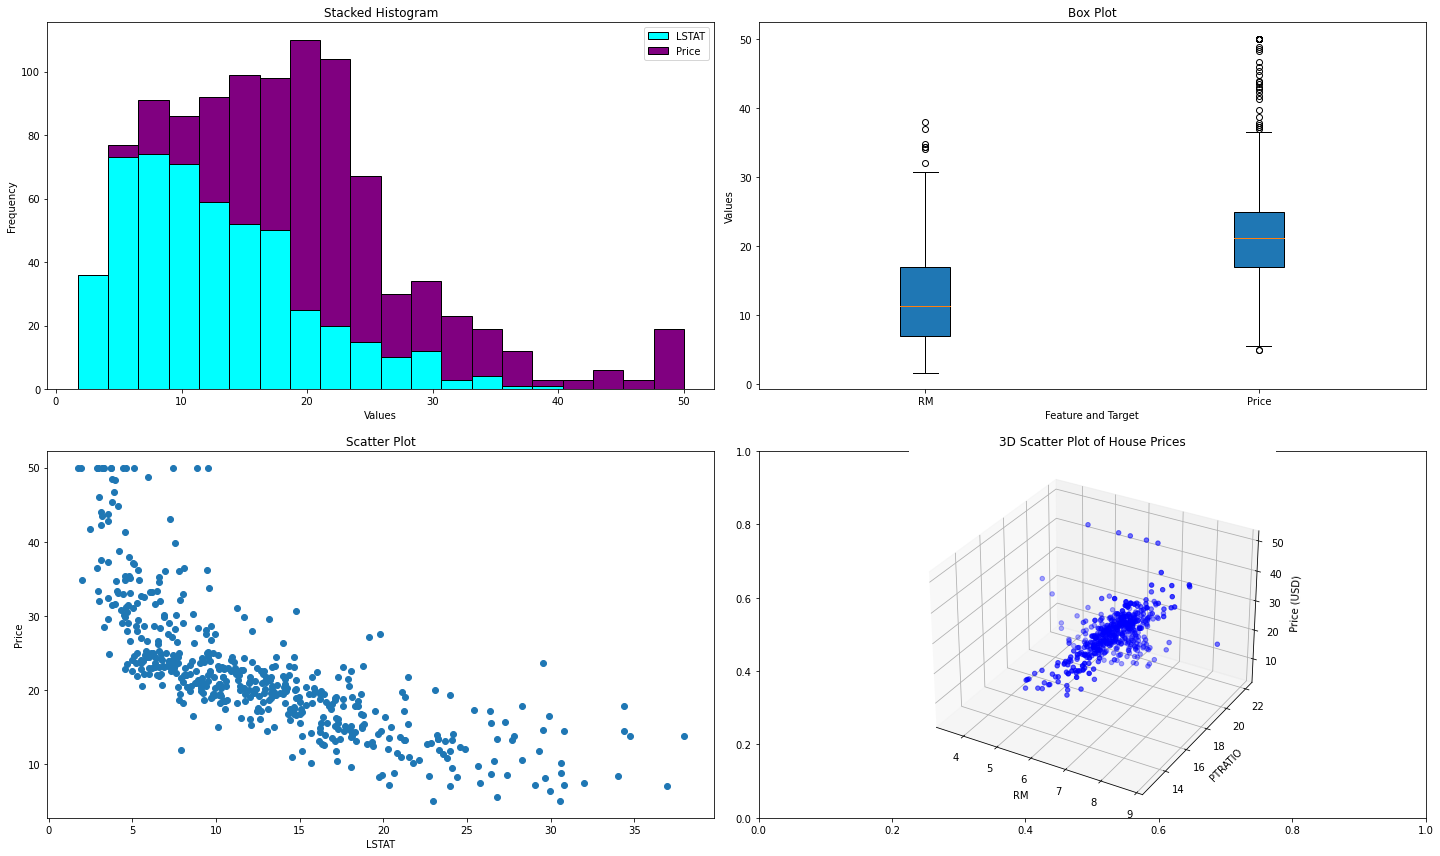

In [14]:
fig, axis = plt.subplots(2,2, figsize = (20,12))

# Creating a stacked histogram
axis[0,0].hist([df_boston['LSTAT'], df_boston['Price']], bins=20, stacked=True, color=['cyan', 'Purple'], edgecolor='black')
axis[0,0].legend(['LSTAT', 'Price'])
axis[0,0].set_xlabel('Values')
axis[0,0].set_ylabel('Frequency')
axis[0,0].set_title('Stacked Histogram')

# Creating box plot
axis[0,1].boxplot([df_boston['LSTAT'], df_boston['Price']], patch_artist=True, labels=['RM', 'Price'])
axis[0,1].set_title('Box Plot')
axis[0,1].set_xlabel('Feature and Target')
axis[0,1].set_ylabel('Values')

# Creating Scatter plot
axis[1,0].scatter(x = df_boston['LSTAT'], y = df_boston['Price'])
axis[1,0].set_title('Scatter Plot')
axis[1,0].set_xlabel('LSTAT')
axis[1,0].set_ylabel('Price')

# Creating a 3D scatter plot in the bottom-right (1,1) subplot
axis_3d = fig.add_subplot(2, 2, 4, projection='3d')
axis_3d.scatter(df_boston['RM'], df_boston['PTRATIO'], df_boston['Price'], c='blue', marker='o')
axis_3d.set_xlabel('RM')
axis_3d.set_ylabel('PTRATIO')
axis_3d.set_zlabel('Price (USD)')
axis_3d.set_title('3D Scatter Plot of House Prices')

# Display the plot
plt.tight_layout()
plt.show()

**Discuss the importance of feature scaling in regression analysis**

1. Feature Scaling is use to bring the columns values in a range suitable for modelling to reduce the disparity 
   among the features range values. Some feature might be normalized but other may not. So to eliminate such
   issue other features are brought in the range easier for an algorithm to perform.
2. The ranges are generally reduces to very small range like -1 to 1 or sth similar. 
3. Facilitaes easier and faster convergence of gradient descent algorithm to minimum error.
4. To reduce the impact of outlier and perform regularization by penalizing features fairely using L2 
   and L1 technique. Feature having large values may unfairely get penalized so feature scaling is important.
5. Common feature scaling are z-score normalization and min-max scaling.


### **Task 2: Regression Analysis**

In [15]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

**Selecting all features of boston dataset**

In [16]:
# Categorize X and y
X = df_feature
y = df_boston['Price']

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Add a constant to the feature set for OLS regression
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

In [20]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
# Initialize and train models
ols_model = sm.OLS(y_train, X_train_ols).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

In [21]:
# Predict with the test data
y_pred_ols = ols_model.predict(X_test_ols)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate and print R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

OLS Regression R^2 score: 0.6688
OLS Regression MSE: 24.2911

Linear Regression R^2 score: 0.6688
Linear Regression MSE: 24.2911

Ridge Regression R^2 score: 0.6660
Ridge Regression MSE: 24.4958

Lasso Regression R^2 score: 0.6687
Lasso Regression MSE: 24.2945



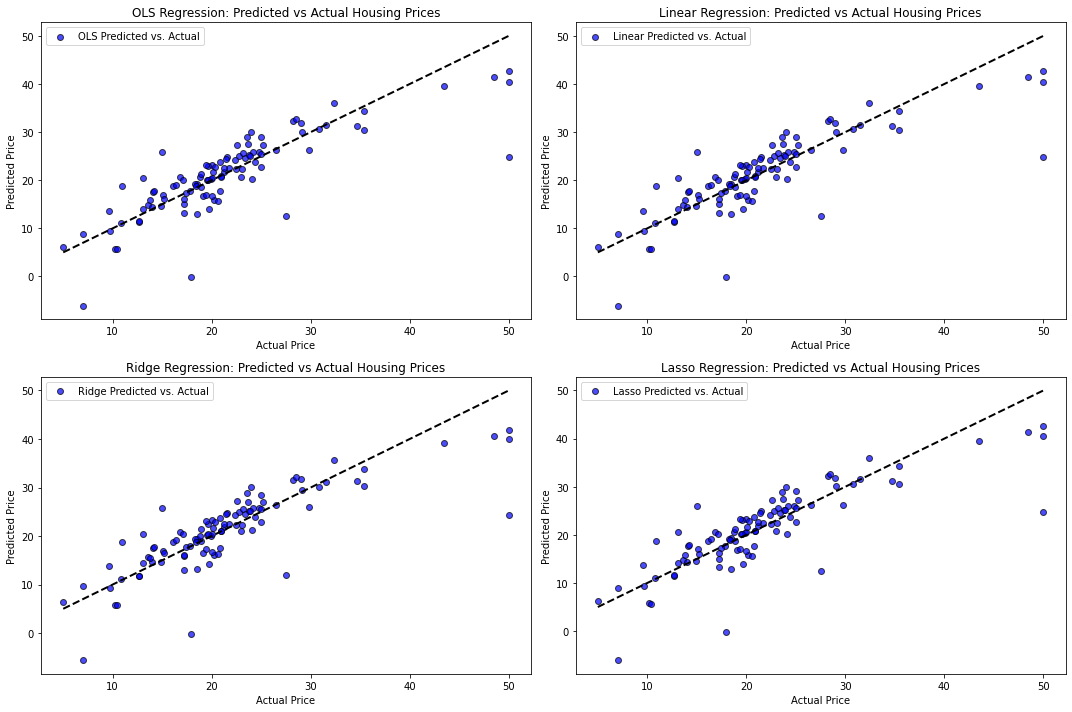

In [23]:
# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()

Model Evaluation: Evaluate each model's performance using the R^2 score and Mean
Squared Error (MSE). Discuss the implications of these metrics in the context of model
selection.

R^2 denotes how much target variable is spread and independent features are able to represent the target variable. 
MSE is the prediction accuracy or the error during prediction. 

R^2 and MSE in the above prediction model do not shows any significant difference. In fact, model with regularization, i.e. Ridge and Lasso, L1 and L2 performs little less than model with no regularization i.r. OLS and linear Regression. 

R^2 and MSE for the models shows :

    OLS Regression R^2 score: 0.6688
    OLS Regression MSE: 24.2911

    Linear Regression R^2 score: 0.6688
    Linear Regression MSE: 24.2911

    Ridge Regression R^2 score: 0.6660
    Ridge Regression MSE: 24.4958

    Lasso Regression R^2 score: 0.6687
    Lasso Regression MSE: 24.2945

Here, as per the figures , OLS Regression and Linear Regression are performing better compared to 'Ridge Regression'
and 'Lasso Regression'
The reason might be :
1. The dataset used might be small in size. 
2. The feature might be less.
3. Dataset may not need L1 and L2 regularization due to low value range and no multicollinearity. 
4. May be features were inadequate to require 'Ridge Regression' and 'Lasso Regression'.


**Select highly correlated features with Target**

In [24]:
# Categorize X and y
X_ = df_feature[['RM', 'PTRATIO', 'LSTAT']]
y_ = df_boston['Price']

In [25]:
# Split data in test and train
X_train_ , X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [26]:
#  Now do feature scaling standarize
scaler = StandardScaler()
X_train_scaled_ = scaler.fit_transform(X_train_)
X_test_scaled_ = scaler.transform(X_test_)

In [27]:
# First add constant for ols 
X_train_ols_ = sm.add_constant(X_train_scaled_)
X_test_ols_ = sm.add_constant(X_test_scaled_)

In [28]:
# Now fit the train datasets in the OLS, Linear, Ragid, Lasso Regression Models
ols_sm_model = sm.OLS(y_train_, X_train_ols_).fit()
y_predict_ols_ = ols_sm_model.predict(X_test_ols_)

# # checking the predicted target for real target 
# for idx,  y in enumerate(y_test_):
#     print(f" Real : {str(y)} , Predicted : {str(y_predict_ols_[idx])}")

# Find the R^2 and MSE
r_square_ols =r2_score(y_test_, y_predict_ols_) 
mse_ols = mean_squared_error(y_test_, y_predict_ols_)
r_square_ols, mse_ols

(0.6302528487272827, 27.11495741558058)

In [29]:
# Working on Linear Regression Model
linear_regressor = LinearRegression().fit(X_train_, y_train_)
y_predict_linear_ = linear_regressor.predict(X_test_)

# # checking the predicted target for real target 
# for idx,  y in enumerate(y_test_):
#     # print(idx , y)
#     print(f" Real : {str(y)} , Predicted : {str(y_predict_linear[idx])}")

# Find the R^2 and MSE
r_square_linear =r2_score(y_test_, y_predict_linear_) 
mse_linear = mean_squared_error(y_test_, y_predict_linear_)
r_square_linear, mse_linear

(0.6302528487272818, 27.114957415580648)

In [30]:
# Working for Ridge model
ridge_regressor = RidgeCV(alphas= [0.1, 1.0, 10.0, 100.0]).fit(X_train_, y_train_)
y_predict_ridge_= ridge_regressor.predict(X_test_)

# Find the R^2 and MSE
r_square_ridge =r2_score(y_test_, y_predict_ridge_) 
mse_ridge = mean_squared_error(y_test_, y_predict_ridge_)
r_square_ridge, mse_ridge

# for idx, y in enumerate(y_test_):
#     print(f" Real : {y}, Predicted : {y_predict_ridge_[idx]}")

(0.6309023242720802, 27.067328916810474)

In [31]:
# Working for Lasso Regression
lasso_regressor = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_, y_train_)
y_predict_lasso_ = lasso_regressor.predict(X_test_)

# Find the R^2 and MSE
r_square_lasso =r2_score(y_test_, y_predict_lasso_) 
mse_lasso = mean_squared_error(y_test_, y_predict_lasso_)
r_square_lasso, mse_lasso

y_test_.dtypes
# for idx, y in enumerate(y_test_):
#     print(f" Real : {y}, Prediction : {y_predict_lasso_[idx]}")
#     # print(idx)

dtype('float64')

In [32]:
# Calculate and print R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_predict_ols_, y_predict_linear_, y_predict_ridge_, y_predict_lasso_]
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

OLS Regression R^2 score: 0.6303
OLS Regression MSE: 27.1150

Linear Regression R^2 score: 0.6303
Linear Regression MSE: 27.1150

Ridge Regression R^2 score: 0.6309
Ridge Regression MSE: 27.0673

Lasso Regression R^2 score: 0.6307
Lasso Regression MSE: 27.0806



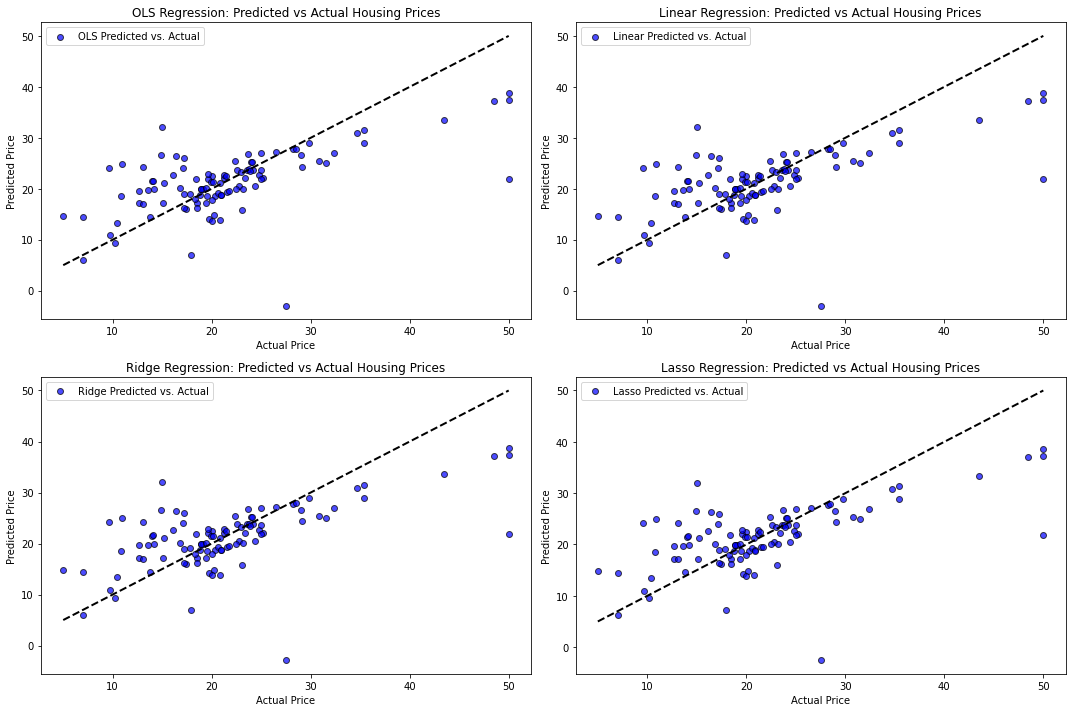

In [43]:
# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)    
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()

R^2 and MSE in the above prediction model do not shows any significant difference. In fact, model with regularization, i.e. Ridge and Lasso, L1 and L2 performs little better than model with no regularization i.e. OLS and linear Regression. 

R^2 and MSE for the models shows :
    OLS Regression R^2 score: 0.6303
    OLS Regression MSE: 27.1150

    Linear Regression R^2 score: 0.6303
    Linear Regression MSE: 27.1150

    Ridge Regression R^2 score: 0.6309
    Ridge Regression MSE: 27.0673

    Lasso Regression R^2 score: 0.6307
    Lasso Regression MSE: 27.0806

Here, as per the figures , 'Ridge Regression' and 'Lasso Regression' are performing nominally better compared to OLS Regression and Linear Regression.
The reason might be :
1. The feature might be less.
2. Dataset may need some level of L1 and L2 regularization due to correlation or multicollinearity between the features.

**Selecting One feature only**

In [34]:
#  Simple Linear Regression
import numpy as np

X__ = df_feature[['RM']]
y__ = df_boston[['Price']]

In [35]:
# Split data in test and train
X_train_uni , X_test_uni, y_train_uni, y_test_uni = train_test_split(X__, y__, test_size=0.2, random_state=42)

In [36]:
#  Now do feature scaling standarize
scaler = StandardScaler()
X_train_scaled_uni = scaler.fit_transform(X_train_uni)
X_test_scaled_uni = scaler.transform(X_test_uni)

In [37]:
#  First add constant for ols 
X_train_ols_uni = sm.add_constant(X_train_scaled_uni)
X_test_ols_uni = sm.add_constant(X_test_scaled_uni)

In [38]:
# Initialize and train models
from sklearn.linear_model import Ridge, Lasso

ols_model = sm.OLS(y_train_uni, X_train_ols_uni).fit()
linear_model = LinearRegression().fit(X_train_scaled_uni, y_train)
ridge_cv = Ridge(alpha=1.0).fit(X_train_scaled_uni, y_train)
lasso_cv = Lasso(alpha=0.1).fit(X_train_scaled_uni, y_train)

In [39]:
# Predict with the test data
y_pred_ols_uni = ols_model.predict(X_test_ols_uni)
y_pred_linear_uni = linear_model.predict(X_test_scaled_uni)
y_pred_ridge_uni = ridge_cv.predict(X_test_scaled_uni)
y_pred_lasso_uni = lasso_cv.predict(X_test_scaled_uni)

y_test_uni
for idx, y in enumerate(y_test_uni['Price']):
    print(f" Real : {y}, Prediction : {y_pred_ols_uni[idx]}")

 Real : 23.6, Prediction : 23.732382925951477
 Real : 32.4, Prediction : 26.929502006973696
 Real : 13.6, Prediction : 19.684568416937953
 Real : 22.8, Prediction : 20.451129132270776
 Real : 16.1, Prediction : 22.61993505857824
 Real : 20.0, Prediction : 22.451665633261282
 Real : 17.8, Prediction : 19.039535619889612
 Real : 14.0, Prediction : 21.470093985579027
 Real : 19.6, Prediction : 21.9842505629364
 Real : 16.8, Prediction : 20.09589367882386
 Real : 21.5, Prediction : 19.385422771930028
 Real : 18.9, Prediction : 19.880882746474406
 Real : 7.0, Prediction : 5.998655157825283
 Real : 21.2, Prediction : 22.012295467155894
 Real : 18.5, Prediction : 17.113785530151084
 Real : 29.8, Prediction : 29.004824919216198
 Real : 18.8, Prediction : 18.712345070662188
 Real : 10.2, Prediction : 9.373391965570962
 Real : 50.0, Prediction : 37.37155467803166
 Real : 14.1, Prediction : 21.572925301050493
 Real : 25.2, Prediction : 22.087081878407876
 Real : 29.1, Prediction : 24.349370818780

In [40]:
# Calculate and print R^2 score and MSE for each model

models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols_uni, y_pred_linear_uni, y_pred_ridge_uni, y_pred_lasso_uni]
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")

OLS Regression R^2 score: 0.3708
OLS Regression MSE: 46.1448

Linear Regression R^2 score: 0.3708
Linear Regression MSE: 46.1448

Ridge Regression R^2 score: 0.3711
Ridge Regression MSE: 46.1170

Lasso Regression R^2 score: 0.3730
Lasso Regression MSE: 45.9829



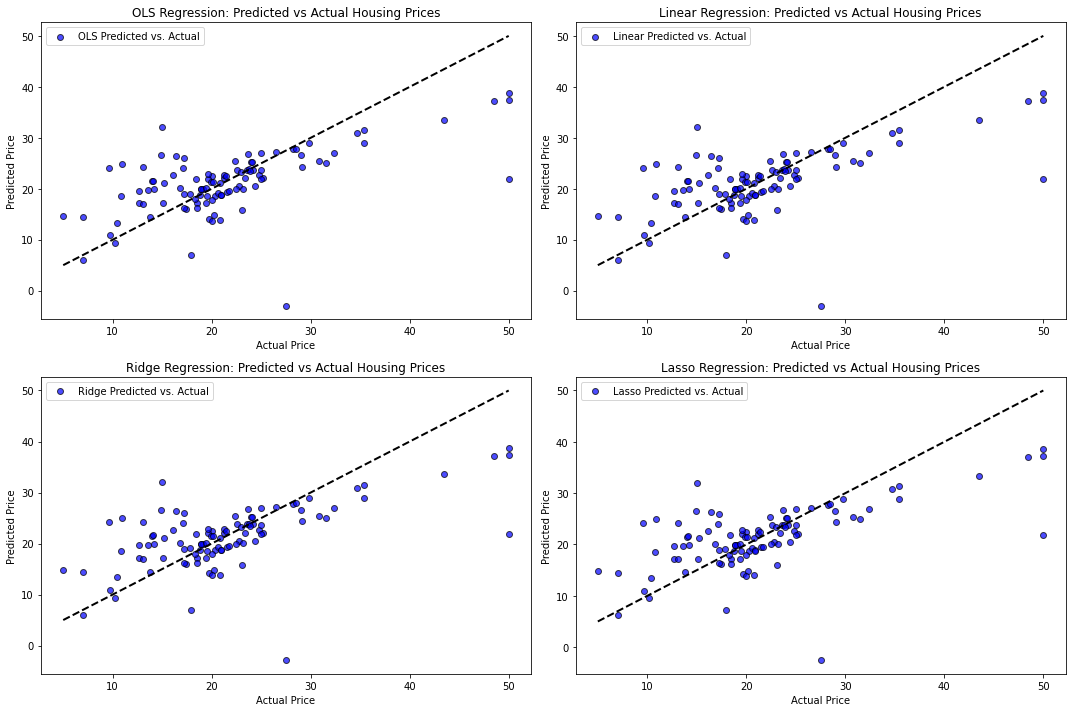

In [41]:
# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()

R^2 and MSE in the above prediction model do not shows any significant difference between the models. In fact, model performs bad when only one feature is considered. 

R^2 and MSE for the models shows :
    OLS Regression R^2 score: 0.3708
    OLS Regression MSE: 46.1448

    Linear Regression R^2 score: 0.3708
    Linear Regression MSE: 46.1448

    Ridge Regression R^2 score: 0.3711
    Ridge Regression MSE: 46.1170

    Lasso Regression R^2 score: 0.3730
    Lasso Regression MSE: 45.9829

The models performed bad due to following reasons:
The reason might be :
1. The feature might not be sufficient to predict the price properly.
2. The drop of other feature cause the loss of significant information.